In [1]:
import tensorflow
import keras

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook as tqdm

In [3]:
train_df = pd.read_csv("dataset/train.csv",parse_dates=['timestamp'],index_col='timestamp')

In [4]:
train_df.head(10)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0
2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0


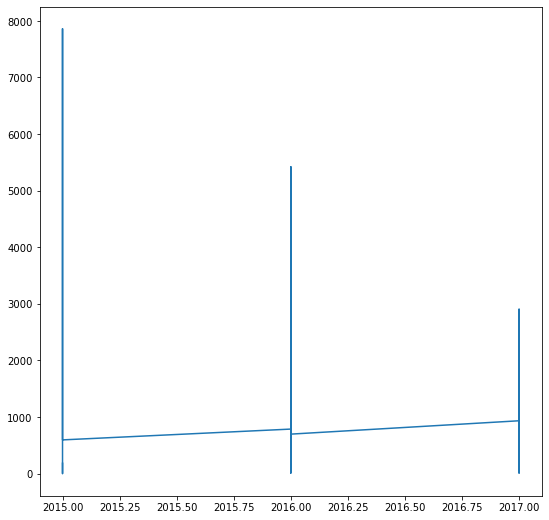

In [5]:
plt.figure(figsize=(9,9))
plt.plot(train_df.index.year,train_df['cnt'])

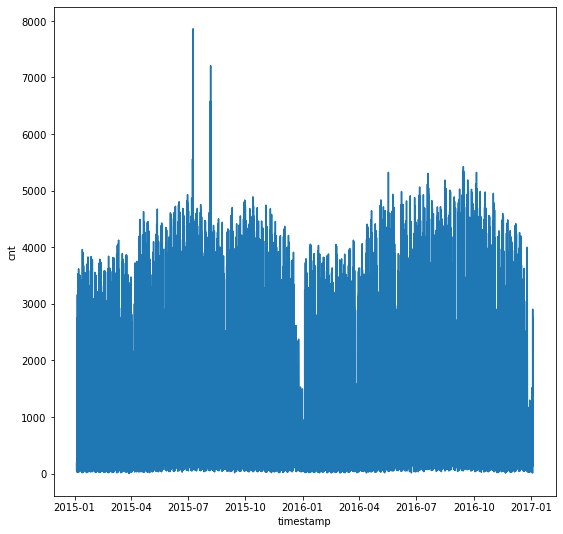

In [6]:
plt.figure(figsize=(9,9))
sns.lineplot(x=train_df.index,y='cnt',data=train_df)

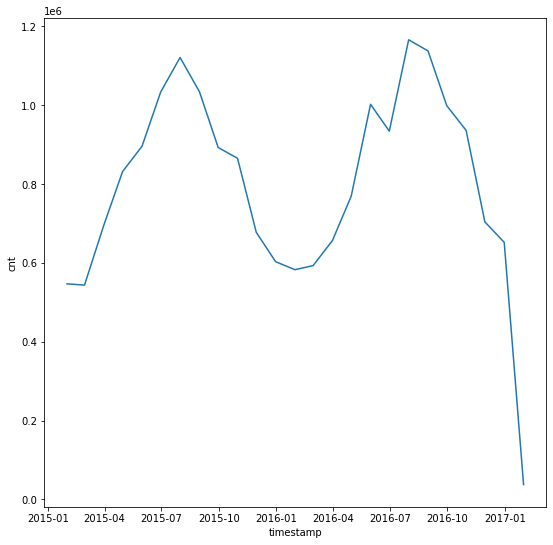

In [7]:
df_by_month = train_df.resample("M").sum()

plt.figure(figsize=(9,9))
sns.lineplot(x=df_by_month.index,y='cnt',data=df_by_month)

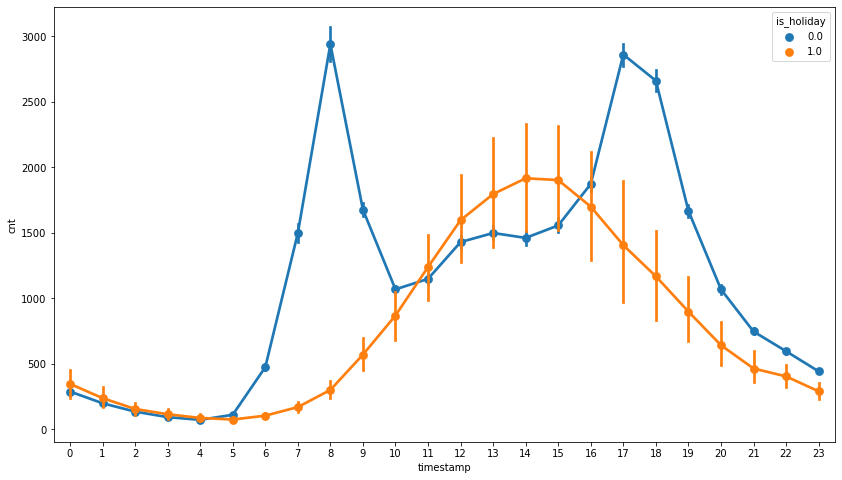

In [8]:
plt.figure(figsize=(14,8))
sns.pointplot(x=train_df.index.hour,y='cnt',data=train_df,hue='is_holiday')

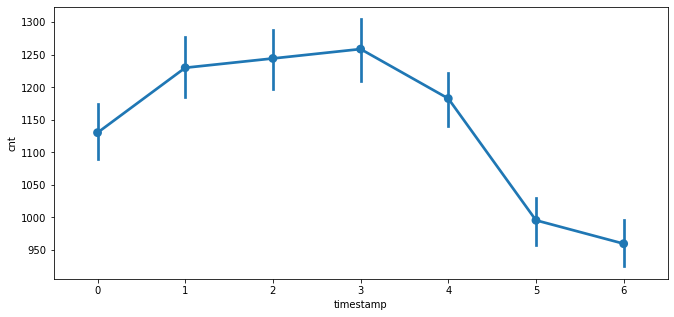

In [9]:
plt.figure(figsize=(11,5))
sns.pointplot(x=train_df.index.dayofweek,y='cnt',data=train_df)

In [10]:
train_len =  int(0.9*len(train_df))
test_len = len(train_df) - train_len

train,test = train_df.iloc[:train_len],train_df.iloc[train_len:len(train_df)]
print(train_df.shape,train.shape,test.shape)

(17414, 9) (15672, 9) (1742, 9)


In [11]:
#train_trans = train[['t1','t2','hum','wind_speed']].to_numpy()
#test_trans = test[['t1','t2','hum','wind_speed']].to_numpy()

In [12]:
from sklearn.preprocessing import RobustScaler

In [13]:
rs = RobustScaler()
rs_cnt = RobustScaler()

t_c = ['t1','t2','hum','wind_speed']

train.loc[:,t_c] = rs.fit_transform(train[t_c].to_numpy())
test.loc[:,t_c] = rs.transform(test[t_c].to_numpy())

C:\Users\danis\Anaconda3\envs\Ai2\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\danis\Anaconda3\envs\Ai2\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [14]:
train['cnt'] = rs_cnt.fit_transform(train[['cnt']])
test['cnt'] = rs_cnt.transform(test[['cnt']])

C:\Users\danis\Anaconda3\envs\Ai2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\danis\Anaconda3\envs\Ai2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
train.to_numpy()
test.to_numpy()

array([[-0.37052342, -0.625     , -0.57142857, ...,  0.        ,
         1.        ,  2.        ],
       [-0.07782369, -0.4375    , -0.47619048, ...,  0.        ,
         1.        ,  2.        ],
       [ 0.34573003, -0.3125    , -0.33333333, ...,  0.        ,
         1.        ,  2.        ],
       ...,
       [-0.35812672, -0.9375    , -1.0952381 , ...,  0.        ,
         0.        ,  3.        ],
       [-0.43595041, -0.9375    , -1.0952381 , ...,  0.        ,
         0.        ,  3.        ],
       [-0.49449036, -1.        , -1.14285714, ...,  0.        ,
         0.        ,  3.        ]])

In [16]:
def create_dataset(x,y,time_steps=1):
    x_train,y_train = [],[]
    
    for i in range(len(x)-time_steps):
        v = x.iloc[i:(i+time_steps)].values
        x_train.append(v)
        y_train.append(y.iloc[i+time_steps])
        
    return np.array(x_train),np.array(y_train)

In [17]:
time_steps = 24

x_train,y_train = create_dataset(train,train.cnt,time_steps)
x_test,y_test = create_dataset(test,test.cnt,time_steps)

print(x_train.shape,y_train.shape)

(15648, 24, 9) (15648,)


In [18]:
from keras.models import Sequential
from keras.layers import Dense,LSTM ,Bidirectional,Dropout

In [19]:
model = Sequential()

model.add(Bidirectional(LSTM(128,
                            input_shape=(x_train.shape[1],x_train.shape[2]))))
model.add(Dropout(0.25))
model.add(Dense(1))

model.compile(loss='mse',optimizer='adam')

In [20]:
history = model.fit(x_train,y_train,
                   epochs=30,
                   batch_size=32,
                   validation_split=0.1,
                   shuffle=False 
                   )

Train on 14083 samples, validate on 1565 samples
Epoch 1/30
14083/14083 [==============================] - 10s 738us/step - loss: 0.1737 - val_loss: 0.1076
Epoch 2/30
14083/14083 [==============================] - 10s 678us/step - loss: 0.0725 - val_loss: 0.0512
Epoch 3/30
14083/14083 [==============================] - 10s 676us/step - loss: 0.0460 - val_loss: 0.0393
Epoch 4/30
14083/14083 [==============================] - 10s 676us/step - loss: 0.0382 - val_loss: 0.0338
Epoch 5/30
14083/14083 [==============================] - 9s 667us/step - loss: 0.0310 - val_loss: 0.0289
Epoch 6/30
14083/14083 [==============================] - 9s 663us/step - loss: 0.0277 - val_loss: 0.0271
Epoch 7/30
14083/14083 [==============================] - 9s 664us/step - loss: 0.0250 - val_loss: 0.0300
Epoch 8/30
14083/14083 [==============================] - 9s 637us/step - loss: 0.0242 - val_loss: 0.0265
Epoch 9/30
14083/14083 [==============================] - 9s 625us/step - loss: 0.0224 - val_loss: 

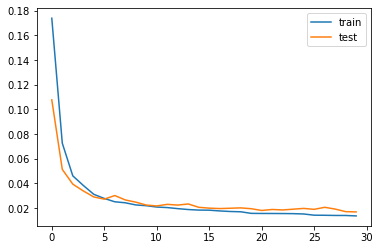

In [21]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()

In [22]:
y_pred = model.predict(x_test)

In [23]:
y_test_inv = rs_cnt.inverse_transform(y_test.reshape(1,-1))
y_pred_inv = rs_cnt.inverse_transform(y_pred)

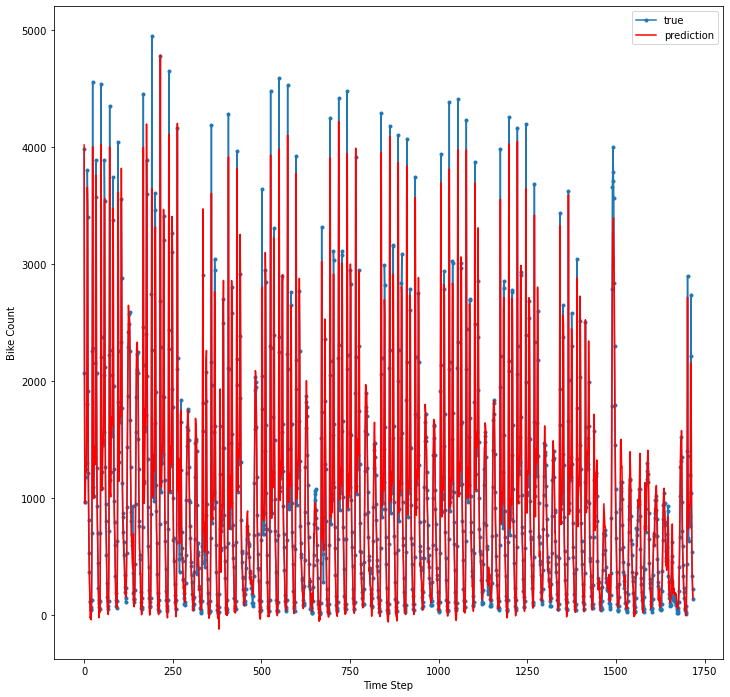

In [24]:
plt.figure(figsize=(12,12))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [25]:
model.save("Final Model")

In [27]:
model_json = model.to_json()

with open('model_injson.json','w') as file:
    file.write(model_json)